<a id="import"></a>

In [1]:
import numpy as np
import pandas as pd

import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import matplotlib.pyplot as plt
import seaborn as sns
from string import ascii_letters

from scipy.stats import norm
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from scipy import stats

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

import warnings
warnings.filterwarnings("ignore")

/tmp/ipykernel_9046/3485993053.py:16: DeprecationWarning:

Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.



In [2]:
df = pd.read_csv("data/Insurance.csv")
df.head()

original_df = df.copy()

In [3]:
charge_dist = df["charges"].values
logcharge = np.log(df["charges"])


trace0 = go.Histogram(
    x=charge_dist,
    histnorm='probability',
    name="Charges Distribution",
    marker = dict(
        color = '#FA5858',
    )
)
trace1 = go.Histogram(
    x=logcharge,
    histnorm='probability',
    name="Charges Distribution using Log",
    marker = dict(
        color = '#58FA82',
    )
)

fig = make_subplots(rows=2, cols=1,
                          subplot_titles=('Charge Distribution','Log Charge Distribution'),
                         print_grid=False)



fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)


fig['layout'].update(showlegend=True, title='Charge Distribution', bargap=0.05)
iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

In [4]:
df['age_cat'] = np.nan
lst = [df]

for col in lst:
    col.loc[(col['age'] >= 18) & (col['age'] <= 35), 'age_cat'] = 'Young Adult'
    col.loc[(col['age'] > 35) & (col['age'] <= 55), 'age_cat'] = 'Senior Adult'
    col.loc[col['age'] > 55, 'age_cat'] = 'Elder'
    
    
labels = df["age_cat"].unique().tolist()
amount = df["age_cat"].value_counts().tolist()

colors = ["#ff9999", "#b3d9ff", " #e6ffb3"]

trace = go.Pie(labels=labels, values=amount,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=20),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))

data = [trace]
layout = go.Layout(title="Amount by Age Category")

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='basic_pie_chart')

In [5]:
bmi = [df["bmi"].values.tolist()]
group_labels = ['Body Mass Index Distribution']

colors = ['#FA5858']

fig = ff.create_distplot(bmi, group_labels, colors=colors)
# Add title
fig['layout'].update(title='Normal Distribution')

iplot(fig, filename='Basic Distplot')

In [6]:
import plotly.graph_objects as go
from plotly.offline import iplot

numeric_df = df.select_dtypes(include='number')

corr = numeric_df.corr()

hm = go.Heatmap(
    z=corr.values,
    x=corr.columns.tolist(),  
    y=corr.columns.tolist(),  
    colorscale='Viridis',
    zmin=-1, zmax=1,
    text=corr.values,
    hoverinfo='text'
)

layout = go.Layout(
    title="Correlation Heatmap",
    xaxis=dict(tickangle=-45),
    yaxis=dict(autorange='reversed')
)

fig = go.Figure(data=[hm], layout=layout)
iplot(fig, filename='labelled-heatmap')


In [7]:
young_adults = df["bmi"].loc[df["age_cat"] == "Young Adult"].values
senior_adult = df["bmi"].loc[df["age_cat"] == "Senior Adult"].values
elders = df["bmi"].loc[df["age_cat"] == "Elder"].values

trace0 = go.Box(
    y=young_adults,
    name = 'Young Adults',
    boxmean= True,
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=senior_adult,
    name = 'Senior Adults',
    boxmean= True,
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)

trace2 = go.Box(
    y=elders,
    name = 'Elders',
    boxmean= True,
    marker = dict(
        color = 'rgb(247, 186, 166)',
    )
)


 

data = [trace0, trace1, trace2]

layout = go.Layout(
    title="Body Mass Index <br> by Age Category",
    xaxis=dict(
        title=dict(
            text="Age Category",
            font=dict(size=16)
        )
    ),
    yaxis=dict(
        title=dict(
            text="Body Mass Index",
            font=dict(size=16)
        )
    )
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)


In [8]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


moore_lm = ols("bmi ~ age_cat", data=df).fit()
print(moore_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     5.949
Date:                Thu, 16 Oct 2025   Prob (F-statistic):            0.00268
Time:                        10:54:54   Log-Likelihood:                -4311.2
No. Observations:                1338   AIC:                             8628.
Df Residuals:                    1335   BIC:                             8644.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [9]:
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

init_notebook_mode(connected=True)

ya_smoker = df["bmi"].loc[(df["age_cat"] == "Young Adult") & (df["smoker"] == "yes")].values
sa_smoker = df["bmi"].loc[(df["age_cat"] == "Senior Adult") & (df["smoker"] == "yes")].values
e_smoker = df["bmi"].loc[(df["age_cat"] == "Elder") & (df["smoker"] == "yes")].values

ya_nonsmoker = df["bmi"].loc[(df["age_cat"] == "Young Adult") & (df["smoker"] == "no")].values
sa_nonsmoker = df["bmi"].loc[(df["age_cat"] == "Senior Adult") & (df["smoker"] == "no")].values
e_nonsmoker = df["bmi"].loc[(df["age_cat"] == "Elder") & (df["smoker"] == "no")].values

x_data = [
    'Young A. Smoker', 'Young A. Non-Smoker',
    'Senior A. Smoker', 'Senior A. Non-Smoker',
    'Elder Smoker', 'Elder Non-Smoker'
]

y_data = [ya_smoker, ya_nonsmoker, sa_smoker, sa_nonsmoker, e_smoker, e_nonsmoker]

colors = [
    'rgba(251, 43, 43, 0.5)', 'rgba(125, 251, 137, 0.5)', 
    'rgba(251, 43, 43, 0.5)', 'rgba(125, 251, 137, 0.5)', 
    'rgba(251, 43, 43, 0.5)', 'rgba(125, 251, 137, 0.5)'
]

traces = []

for xd, yd, cls in zip(x_data, y_data, colors):
    traces.append(go.Box(
        y=yd,
        name=xd,
        boxpoints='all',
        jitter=0.5,
        whiskerwidth=0.2,
        fillcolor=cls,
        marker=dict(size=2),
        line=dict(width=1)
    ))

layout = go.Layout(
    title='Body Mass Index of Smokers Status by Age Category',
    xaxis=dict(title=dict(text="Status", font=dict(size=16))),
    yaxis=dict(title=dict(text="Body Mass Index", font=dict(size=16)),
               autorange=True,
               showgrid=True,
               zeroline=True,
               dtick=5,
               gridcolor='rgb(255, 255, 255)',
               gridwidth=1,
               zerolinecolor='rgb(255, 255, 255)',
               zerolinewidth=2),
    margin=dict(l=40, r=30, b=80, t=100),
    paper_bgcolor='rgb(255, 255, 255)',
    plot_bgcolor='rgb(255, 243, 192)',
    showlegend=False
)

fig = go.Figure(data=traces, layout=layout)
iplot(fig)

In [10]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots     # ✅ Correct import
from plotly.offline import iplot, init_notebook_mode

init_notebook_mode(connected=True)

# Mean could be affected easily by outliers or extreme cases.
# ----------------------------
# Means
avg_ya_charge = df["charges"].loc[df["age_cat"] == "Young Adult"].mean()
avg_sa_charge = df["charges"].loc[df["age_cat"] == "Senior Adult"].mean()
avg_e_charge = df["charges"].loc[df["age_cat"] == "Elder"].mean()

# Medians
med_ya_charge = df["charges"].loc[df["age_cat"] == "Young Adult"].median()
med_sa_charge = df["charges"].loc[df["age_cat"] == "Senior Adult"].median()
med_e_charge = df["charges"].loc[df["age_cat"] == "Elder"].median()

# ----------------------------
# Bar plots
average_plot = go.Bar(
    x=['Young Adults', 'Senior Adults', 'Elder'],
    y=[avg_ya_charge, avg_sa_charge, avg_e_charge],
    name='Mean',
    marker=dict(color="#F5B041")
)

med_plot = go.Bar(
    x=['Young Adults', 'Senior Adults', 'Elder'],
    y=[med_ya_charge, med_sa_charge, med_e_charge],
    name='Median',
    marker=dict(color="#48C9B0")
)

# ----------------------------
# Create subplots properly
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{}, {}]],
    subplot_titles=('Average Charge by Age', 'Median Charge by Age'),
    shared_yaxes=True
)

fig.add_trace(average_plot, row=1, col=1)
fig.add_trace(med_plot, row=1, col=2)

# ----------------------------
# Layout
fig.update_layout(
    showlegend=True,
    title='Age Charges',
    xaxis=dict(title="Age Category"),
    yaxis=dict(title="Patient Charges"),
    bargap=0.15
)

iplot(fig)


In [11]:
df["weight_condition"] = np.nan
lst = [df]

for col in lst:
    col.loc[col["bmi"] < 18.5, "weight_condition"] = "Underweight"
    col.loc[(col["bmi"] >= 18.5) & (col["bmi"] < 24.986), "weight_condition"] = "Normal Weight"
    col.loc[(col["bmi"] >= 25) & (col["bmi"] < 29.926), "weight_condition"] = "Overweight"
    col.loc[col["bmi"] >= 30, "weight_condition"] = "Obese"
    
df.head()

,age,sex,bmi,children,smoker,region,charges,AQI,age_cat,weight_condition
0,19,female,27.900,0,yes,southwest,16884.92400,100,Young Adult,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,136,Young Adult,Obese
2,28,male,33.000,3,no,southeast,4449.46200,147,Young Adult,Obese
3,33,male,22.705,0,no,northwest,21984.47061,76,Young Adult,Normal Weight
4,32,male,28.880,0,no,northwest,3866.85520,100,Young Adult,Overweight


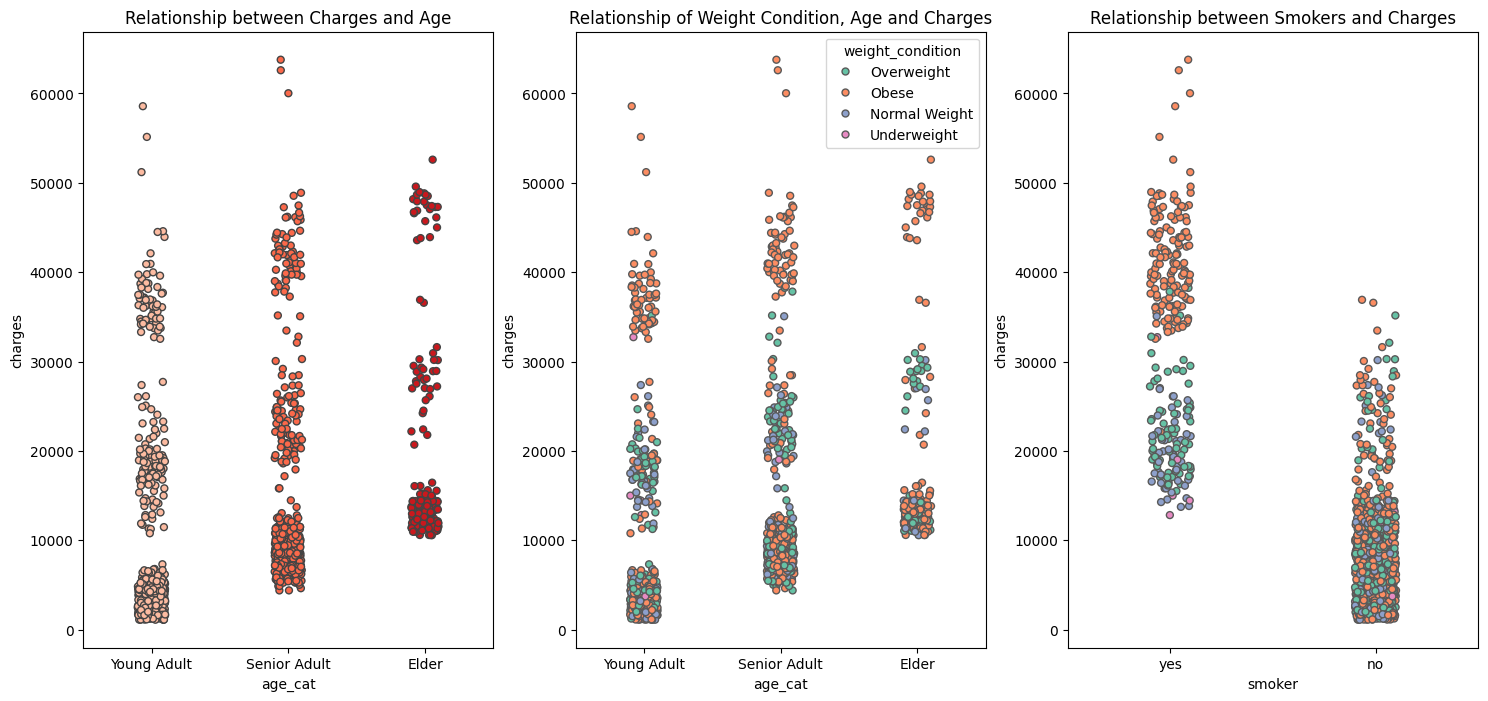

In [12]:
# Create subpplots
f, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18,8))

# I wonder if the cluster that is on the top is from obese people
sns.stripplot(x="age_cat", y="charges", data=df, ax=ax1, linewidth=1, palette="Reds")
ax1.set_title("Relationship between Charges and Age")


sns.stripplot(x="age_cat", y="charges", hue="weight_condition", data=df, ax=ax2, linewidth=1, palette="Set2")
ax2.set_title("Relationship of Weight Condition, Age and Charges")

sns.stripplot(x="smoker", y="charges", hue="weight_condition", data=df, ax=ax3, linewidth=1, palette="Set2")
ax3.legend_.remove()
ax3.set_title("Relationship between Smokers and Charges")

plt.show()

In [13]:
df[df.isnull().any(axis=1)]

,age,sex,bmi,children,smoker,region,charges,AQI,age_cat,weight_condition


In [14]:
fig = ff.create_facet_grid(
    df,
    x='age',
    y='charges',
    color_name='weight_condition',
    show_boxes=False,
    marker={'size': 10, 'opacity': 1.0},
    colormap={'Underweight': 'rgb(208, 246, 130)', 'Normal Weight': 'rgb(166, 246, 130)',
             'Overweight': 'rgb(251, 232, 238)', 'Obese': 'rgb(253, 45, 28)'}
)
251, 232, 238


fig['layout'].update(title="Weight Status vs Charges", width=800, height=600, plot_bgcolor='rgb(251, 251, 251)', 
                     paper_bgcolor='rgb(255, 255, 255)')


iplot(fig, filename='facet - custom colormap')

In [15]:
obese_avg = df["charges"].loc[df["weight_condition"] == "Obese"].mean()

df["charge_status"] = np.nan
lst = [df]


for col in lst:
    col.loc[col["charges"] > obese_avg, "charge_status"] = "Above Average"
    col.loc[col["charges"] < obese_avg, "charge_status"] = "Below Average"
    
df.head()

,age,sex,bmi,children,smoker,region,charges,AQI,age_cat,weight_condition,charge_status
0,19,female,27.900,0,yes,southwest,16884.92400,100,Young Adult,Overweight,Above Average
1,18,male,33.770,1,no,southeast,1725.55230,136,Young Adult,Obese,Below Average
2,28,male,33.000,3,no,southeast,4449.46200,147,Young Adult,Obese,Below Average
3,33,male,22.705,0,no,northwest,21984.47061,76,Young Adult,Normal Weight,Above Average
4,32,male,28.880,0,no,northwest,3866.85520,100,Young Adult,Overweight,Below Average


Obesity vs smoking


Text(0.5, 1.0, 'Smokers')

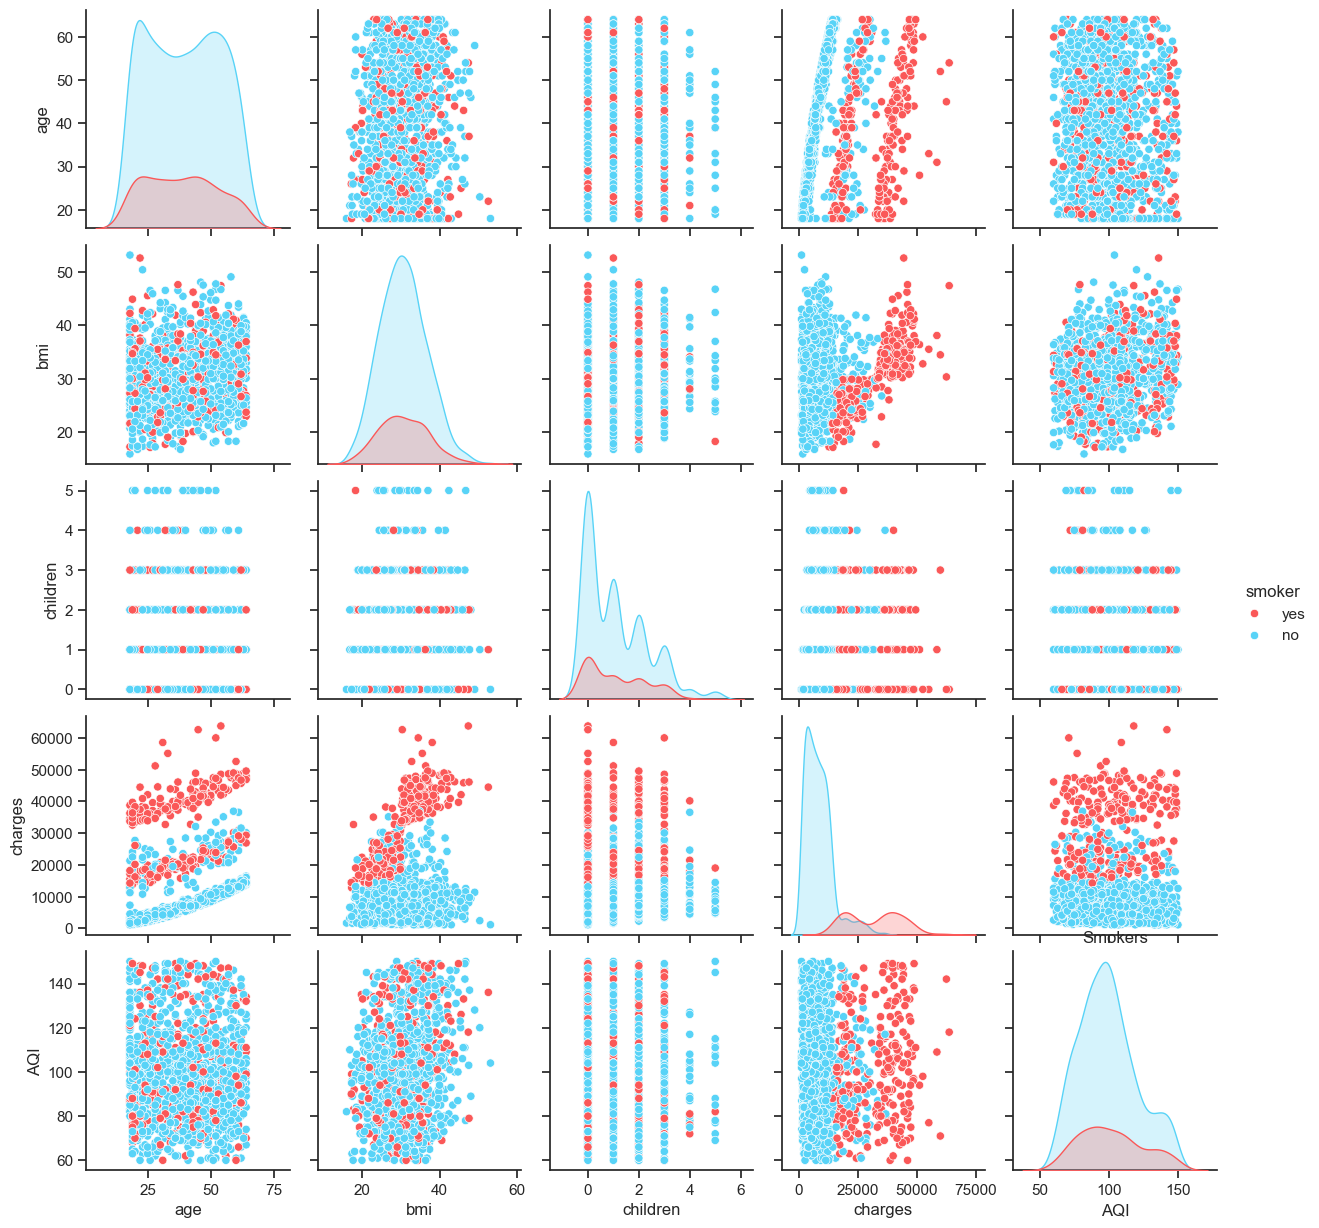

In [16]:
import seaborn as sns
sns.set(style="ticks")
pal = ["#FA5858", "#58D3F7"]

sns.pairplot(df, hue="smoker", palette=pal)
plt.title("Smokers")

In [ ]:
total_obese = len(df.loc[df["weight_condition"] == "Obese"])

obese_smoker_prop = len(df.loc[(df["weight_condition"] == "Obese") & (df["smoker"] == "yes")]) / total_obese
obese_smoker_prop = round(obese_smoker_prop, 2)

obese_nonsmoker_prop = len(df.loc[(df["weight_condition"] == "Obese") & (df["smoker"] == "no")]) / total_obese
obese_nonsmoker_prop = round(obese_nonsmoker_prop, 2)

charge_obese_smoker = df.loc[(df["weight_condition"] == "Obese") & (df["smoker"] == "yes"), "charges"].mean()
charge_obese_nonsmoker = df.loc[(df["weight_condition"] == "Obese") & (df["smoker"] == "no"), "charges"].mean()

TypeError: Could not convert ['malemalefemalemalemalemalemalemalemalemalemalemalemalefemalefemalefemalemalemalemalemalefemalefemalemalefemalemalefemalefemalemalemalemalemalemalemalemalemalefemalemalemalemalefemalemalemalefemalefemalemalemalemalemalemalemalemalefemalemalefemalemalemalemalefemalefemalefemalemalefemalefemalemalefemalefemalemalemalefemalemalefemalemalefemalemalemalemalemalefemalefemalefemalemalemalemalemalefemalefemalemalemalefemalefemalefemalefemalefemalefemalefemalemalemalemalemalemalemalemalemalemalefemalemalefemalemalefemalemalemalemalemalemalemalemalefemalefemalemalemalemalefemalefemalefemalefemalemalefemalemalemalefemalemalefemalemalemalemalemalemalemalemalemalemalemalefemalefemalefemale'
 'yesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyesyes'
 'southeastsouthwestnortheastsouthwestsouthwestsouthwestnortheastsouthwestsoutheastsoutheastnorthwestsoutheastsoutheastsouthwestnorthwestsouthwestsoutheastnortheastnorthwestsoutheastsoutheastsouthwestnortheastsoutheastsouthwestnortheastsouthwestsoutheastnortheastnorthwestnorthwestnorthwestsoutheastsouthwestnortheastnortheastsoutheastnorthwestsoutheastsouthwestsouthwestnorthwestsouthwestnortheastnortheastsouthwestsoutheastnortheastsoutheastsoutheastnortheastsouthwestsouthwestsoutheastsouthwestsoutheastsoutheastsoutheastsoutheastnorthwestnorthwestnortheastnorthwestsouthwestsoutheastsoutheastsouthwestnortheastnorthwestsoutheastnorthwestnortheastsoutheastnorthwestsouthwestsoutheastsoutheastsoutheastsoutheastsoutheastnortheastsouthwestnortheastsoutheastsoutheastnorthwestsoutheastnortheastsoutheastsoutheastnortheastnortheastsoutheastsouthwestnortheastsoutheastsoutheastnortheastnortheastsoutheastsouthwestsoutheastnortheastsouthwestsoutheastsoutheastsoutheastsoutheastnorthwestnortheastsoutheastsouthwestsoutheastsoutheastsoutheastsoutheastnorthwestnortheastsoutheastsoutheastsoutheastsouthwestnorthwestnortheastnorthwestsouthwestsoutheastsoutheastnorthwestnorthwestsouthwestsouthwestnorthwestsoutheastsoutheastnortheastnortheastsouthwestsouthwestsouthwestsoutheastnorthwestsouthwestsouthwestsoutheast'] to numeric